client - browger

server - Web app --> DB 와 연결되어있음

### 웹 크롤링

- 크롤링 절차
    - 1. 웹 서비스 확인 : URL
    - 2. URL > request, response : json(str)
    - 3. json(str) > dict(parsing) : DataFrame    
    
- naver stock 데이터 수집
    - kospi,kosdaq,usd(login)



In [1]:
import requests

In [56]:
# 1. URL
code, page_size, page = 'KOSPI',100,1
url = 'https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code={}&pageSize={}&page={}'.format(code,page_size,page)

url

'https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code=KOSPI&pageSize=100&page=1'

In [57]:
# 2. URL > reqquests,response : JSON(str)

response = requests.get(url)
response

<Response [200]>

In [58]:
import pandas as pd
# 3. JSON(str) > dict(parsing) : DF
datas = response.json()['result']['siseList']
kospi_df=pd.DataFrame(datas)

In [59]:
kospi_df

,cd,dt,ncv,cv,cr,ov,hv,lv
0,KOSPI,20200626,2132.54,20.17,0.95,2137.47,2142.04,2115.25
1,KOSPI,20200625,2112.37,-49.14,-2.27,2130.45,2143.33,2112.37
2,KOSPI,20200624,2161.51,30.27,1.42,2145.93,2171.86,2143.91
3,KOSPI,20200623,2131.24,4.51,0.21,2149.13,2158.15,2110.51
4,KOSPI,20200622,2126.73,-14.59,-0.68,2126.38,2142.88,2122.10
...,...,...,...,...,...,...,...,...
95,KOSPI,20200210,2201.07,-10.88,-0.49,2185.63,2203.39,2180.51
96,KOSPI,20200207,2211.95,-15.99,-0.72,2221.49,2223.92,2198.14
97,KOSPI,20200206,2227.94,62.31,2.88,2184.77,2229.99,2182.25
98,KOSPI,20200205,2165.63,7.73,0.36,2177.26,2181.52,2154.88


In [50]:
def get_stock_data(code='KOSPI',page_size=100,page=1):
    
    url = 'https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code={}&pageSize={}&page={}'.format(code,page_size,page)
    response = requests.get(url)
    return pd.DataFrame(response.json()['result']['siseList'])

In [26]:
get_stock_data(page_size=100)

,cd,dt,ncv,cv,cr,ov,hv,lv
0,KOSPI,20200626,2138.12,25.75,1.22,2137.47,2142.04,2115.25
1,KOSPI,20200625,2112.37,-49.14,-2.27,2130.45,2143.33,2112.37
2,KOSPI,20200624,2161.51,30.27,1.42,2145.93,2171.86,2143.91
3,KOSPI,20200623,2131.24,4.51,0.21,2149.13,2158.15,2110.51
4,KOSPI,20200622,2126.73,-14.59,-0.68,2126.38,2142.88,2122.10
...,...,...,...,...,...,...,...,...
95,KOSPI,20200210,2201.07,-10.88,-0.49,2185.63,2203.39,2180.51
96,KOSPI,20200207,2211.95,-15.99,-0.72,2221.49,2223.92,2198.14
97,KOSPI,20200206,2227.94,62.31,2.88,2184.77,2229.99,2182.25
98,KOSPI,20200205,2165.63,7.73,0.36,2177.26,2181.52,2154.88


In [51]:
kosdaq_df=get_stock_data(code='KOSDAQ',page_size=100)

In [53]:
kosdaq_df

,cd,dt,ncv,cv,cr,ov,hv,lv
0,KOSDAQ,20200626,751.42,1.06,0.14,758.62,758.62,742.57
1,KOSDAQ,20200625,750.36,-9.14,-1.20,749.81,757.23,745.98
2,KOSDAQ,20200624,759.50,6.27,0.83,758.15,765.21,755.12
3,KOSDAQ,20200623,753.23,1.59,0.21,758.61,761.37,744.26
4,KOSDAQ,20200622,751.64,9.61,1.30,742.98,752.98,741.78
...,...,...,...,...,...,...,...,...
95,KOSDAQ,20200210,676.07,3.44,0.51,669.53,676.08,668.10
96,KOSDAQ,20200207,672.63,-0.06,-0.01,673.11,674.03,667.93
97,KOSDAQ,20200206,672.69,11.37,1.72,665.94,672.69,665.88
98,KOSDAQ,20200205,661.32,0.08,0.01,666.74,668.91,658.03


In [42]:
# USD 환율 데이터 가져오기

# 1. URL
code, page_size, page = 'FX_USDKR',100,1
url = 'https://m.stock.naver.com/api/json/marketindex/marketIndexDay.nhn?marketIndexCd={}W&pageSize={}&page={}'.format(code,page_size,page)

# 2. req, rep , header 설정(cookie) : JSON
headers = {
    'cookie':'NNB=HEZ74BY4NT2V4; NRTK=ag#all_gr#1_ma#-2_si#0_en#0_sp#0; MM_NEW=1; NFS=2; MM_NOW_COACH=1; nid_inf=-1456492591; NID_AUT=sa165SFpap4+M3JiOKI89fisAQQau1PlJnJrhwVOGcrxNDKjxhHtmm4MdnxrN2Lg; NID_JKL=dyMe6fnwKH9D3xcJfcX+OUXBHGxSK7zOw/h6gsbeHEA=; nx_ssl=2; NID_SES=######2+omnhk73lEdju4wOMwQTFqpzYhceaoqukQEliXOqmaw8SY7ZoWWFPvr7AlDauU28GiA8nK7dtwvMa+d9Ca/cCmIvFqcxd623qFi/fLwtxHdT714NDYLINcM4XKMhrXBopQ/BPqZ6GxYWKqBGeae8KsnnBjotmPPljD1IpIr4J+TfN84toIi2Cv/WsTq+v2kSjQG0hq+TUYVyPFcm2/C/713kNFidbar10xIMLWH0tgNXIcxJvwwekxD388ZFaSzL94FJlaejoeY8376aKTmkATANBFmhJnMtWAgkRR8pzG2bvck5DtkDrQP+dN+VQERNwOEBBHv7ftvloR/rJXL5aFQLRutgs4ACYuTNPOmuM5Cbw1UIyc7S9LXW+38mXueJ3ATAcOXpXQ43NYwqzbF50o1UerWJiuUW+NycIcc5wJ81refUztXzEvJV+LAOv/4bhPJhAfEYIV5UlAEyFRCbybV+Qn62LdnFmplqvmIRayImvHKWslw22DktnOX2bj4PWM1UjWjNmkmU7HkedoKniK2zSfr8i+eONzRbOUwRH; page_uid=UYT4adp0JWCssF/YktKssssstWo-188376; XSRF-TOKEN=bdc699f4-cb19-47d2-b91c-5250019c9f25; JSESSIONID=786B0068AC1D7F800BF9C71B1BDAE6B7; BMR='
}
response = requests.get(url,headers=headers)
response
# 3. JSON > DF

datas = response.json()['result']['marketIndexDay']
usd_df = pd.DataFrame(datas)
usd_df.tail(2)

,dt,nv,cv,cr,cbv,csv,sv,rv
98,20200205,1184.5,-4.0,-0.34,1205.22,1163.78,1196.1,1172.9
99,20200204,1188.5,-5.5,-0.46,1209.29,1167.71,1200.1,1176.9


In [61]:
from sklearn import preprocessing

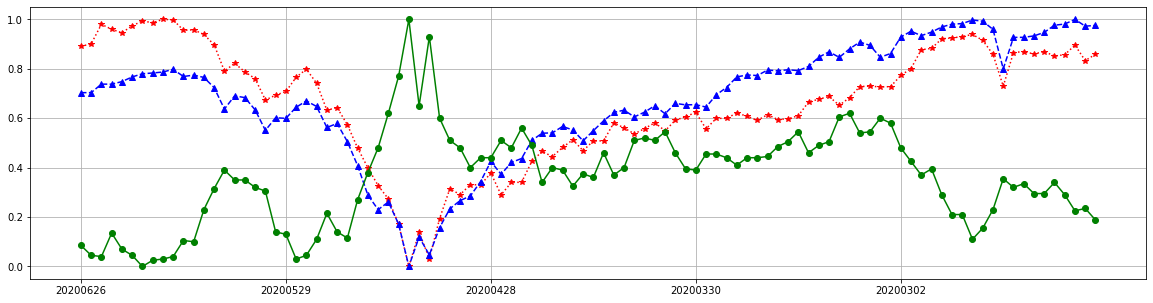

In [69]:
import matplotlib.pyplot as plt

data1 = preprocessing.minmax_scale(kospi_df['ncv'][::-1])
data2 = preprocessing.minmax_scale(kosdaq_df['ncv'][::-1])
data3 = preprocessing.minmax_scale(usd_df['nv'][::-1])


plt.figure(figsize=(20,5))
plt.plot(kospi_df.dt,data1,'r*:',label='kospi')
plt.plot(kosdaq_df.dt,data2,'b^--',label='kosdaq')
plt.plot(usd_df.dt,data3,'go-',label='usd')
plt.grid()
step = len(kospi_df) // 5

plt.xticks(kospi_df[::step]['dt'])
plt.show()

In [68]:
import numpy as np
np.corrcoef(data1,data2)[0,1] ** 2, np.corrcoef(data1,data3)[0,1]**2

(0.7417797261268348, 0.5635853068485726)